# Credit Card Fraud - Jupyter Notebook

## Welcome to your notebook!

This is where you will read, write, and execute Python code. We will work through this notebook together, but you'll find notes including between code cells to help you keep on track.

Developers typically start using a new programming language by figuring out how to get the computer to output "Hello World." You can do so here by clicking into the code cell below and typing *shift-Enter* or by clicking the "Run" button above. Then, modify the code to print out another message!

In [1]:
print("Hello World!")

Hello World!


## Loading the dataset

Our dataset, stored in **data/creditcard.csv**, is from a publicly available set of [credit card transactions](https://www.kaggle.com/mlg-ulb/creditcardfraud). These card present transactions are from European cardholders in September 2013. This dataset is commonly referenced in research literature in the fraud space.

Our ability to make good predictions depends on the data we use -- what differences might you expect between the model we will make based on this dataset and models built on more recent data?

In [2]:
import pandas as pd

data = pd.read_csv("../data/creditcard_data.csv", index_col=0)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Building our model

We want to build a decision tree that is able to predict whether a certain transaction is fraudulent based on the data available to us.

Again, we won't start from scratch; we'll use a data science toolkit called [sklearn](https://scikit-learn.org/stable/modules/tree.html), but we'll need to specify what data we are using as input and which column we want to predict as output.

In [6]:
from sklearn import tree

# Use all data except the 'Class' column as input
X = data.drop('Class', axis=1)
# Use the 'Class' column as what we want to predict as output
y = data['Class']

# Create an empty model 
model = tree.DecisionTreeClassifier()

# Fit the model to our data
model = model.fit(X, y)

## Evaluating our model

We've built our tree -- now let's test it.

In the cell below, use **model.score(X, y)** to evaluate the accuracy of our tree using our input and output data.

In [7]:
model.score(X, y)

1.0

## Model iteration

Just like much of writing is reading and re-writing, when data scientists test their models, they analyze the results and re-build the models.

What might explain the accuracy score of your model?

In [8]:
from sklearn.model_selection import train_test_split

# Split X and y (our input and outputs) into training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

Below is the code we used to build the model before; **modify it to use your training and testing datasets.**

In [9]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9990519995786665

Again, what might explain the accuracy score of your model?

With data about a transaction and no model to form a prediction, what would you guess?

0    284315
1       492
Name: Class, dtype: int64


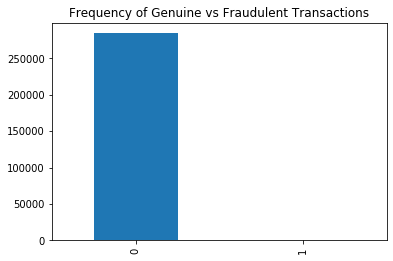

In [11]:
counts = pd.value_counts(data["Class"])

print(counts)
counts.plot(kind="bar",
           title="Frequency of Genuine vs Fraudulent Transactions")

Why is this a problem?

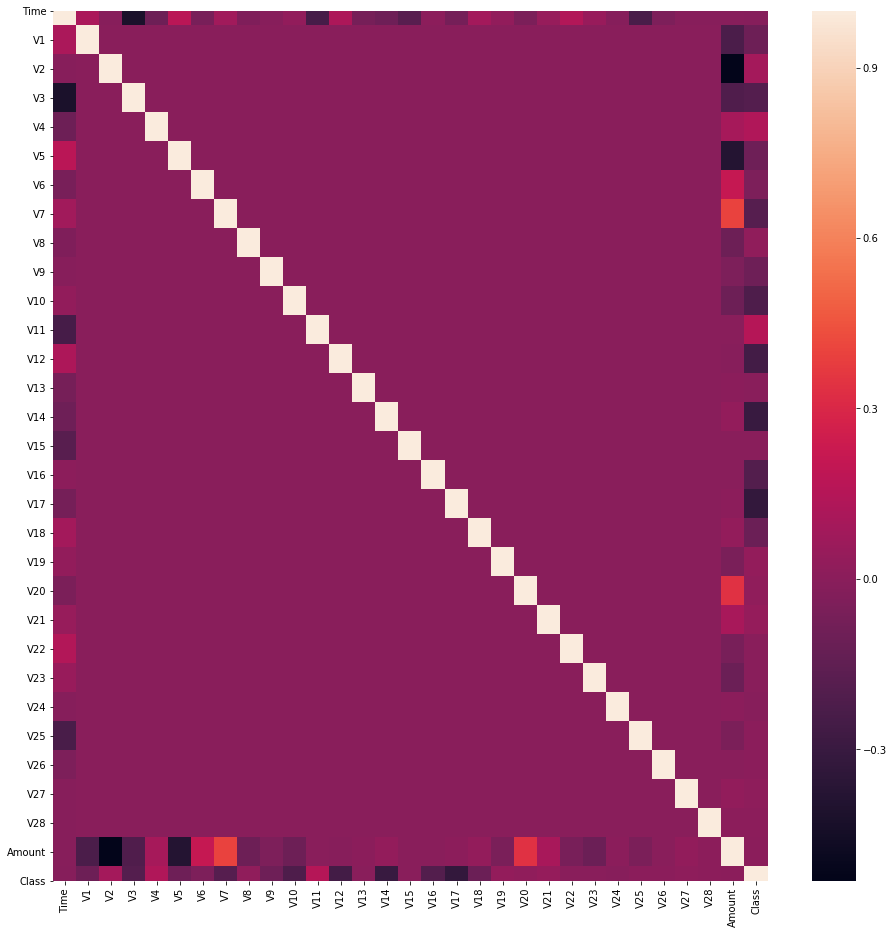

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix)

## Transforming the data

Data scientists make choices that impact model outputs. To deal with this class imbalance, we could choose to oversample the minority class or undersample the majority; there are trade offs with each.

With more time, we might test multiple strategies. Today we'll undersample the number of genuine transactions.

**Modify the code below to sample the number of genuine transactions that balance the classes.**

In [13]:
# How many genuine transactions should we use to balance the classes?
number_genuine = 492

# Separate genuine transactions and fraud
genuine = data[data["Class"] == 0].sample(number_genuine)
fraud = data[data["Class"] == 1]

# Combine fraud and genuine
even_data = pd.concat([genuine, fraud])

# Summarize our new dataset, even_data
even_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88975.012195,-2.373824,1.838862,-3.566510,2.275822,-1.541602,-0.763299,-2.781897,0.309125,-1.275379,...,0.344511,0.013015,-0.017879,-0.071283,0.042301,0.018831,0.101784,0.039396,95.924502,0.500000
std,48308.788865,5.548292,3.688446,6.201084,3.170556,4.203218,1.672976,5.843983,4.855942,2.338012,...,2.791408,1.176789,1.200121,0.565033,0.684042,0.471528,1.013359,0.428284,213.258877,0.500254
min,162.000000,-30.552380,-10.060434,-31.103685,-3.788902,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.404883,-4.781606,-1.450303,-7.263482,-1.869290,0.000000,0.000000
25%,46984.250000,-2.871640,-0.108765,-5.113334,-0.071504,-1.703842,-1.576412,-3.060742,-0.207195,-2.331368,...,-0.174065,-0.541855,-0.253785,-0.405936,-0.297717,-0.278244,-0.056985,-0.058762,1.290000,0.000000
50%,82688.000000,-0.762562,0.951926,-1.459753,1.296099,-0.375082,-0.723916,-0.604110,0.156817,-0.694979,...,0.148445,0.036732,-0.040045,0.003537,0.074012,-0.047627,0.053019,0.033366,15.990000,0.500000
75%,134766.750000,1.099417,2.833075,0.255674,4.202830,0.512625,-0.003228,0.265739,0.855025,0.186123,...,0.628544,0.579242,0.192570,0.351439,0.404305,0.290548,0.477727,0.222696,99.937500,1.000000
max,172273.000000,2.296579,22.057729,3.495747,12.114672,11.095089,6.474115,5.802537,20.007208,6.197932,...,27.202839,8.361985,6.541486,1.098406,2.208209,2.745261,3.626276,2.086905,2125.870000,1.000000


Previously, we used the correlation matrix to get a sense of the predictive power of our intial dataset, "data".

**Modify the code below to view the correlation matrix of our new dataset, "even_data".**

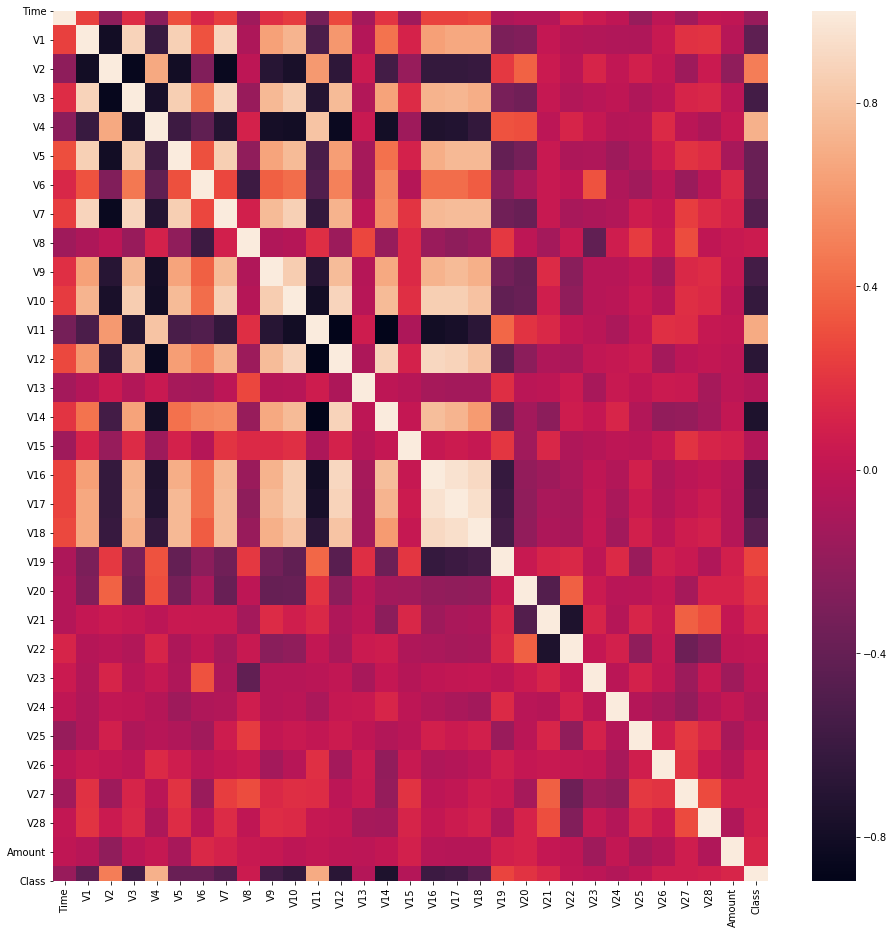

In [27]:
plt.figure(figsize=(16,16))

correlation_matrix = even_data.corr()
sns.heatmap(correlation_matrix)

Since we have a new dataset, we'll need to recreate our inputs, outputs, and split them into training and testing sets.

In [15]:
# Create inputs and outputs with new dataset
X = even_data.drop('Class', axis=1)
y = even_data['Class']

# Split new inputs and outputs into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# Train and score decision tree using new data
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9121621621621622

You'll notice we're repeating a lot of the same code -- let's put it in a function to make it easier to use later.

Run the cell below to *define* a function called fit_and_score_model, which creates a decision tree model to predict the 'Class' column using the dataset you specify. When you provide information to a function, put it in the parentheses.

In [16]:
def fit_and_score_model(data, max_depth=None):
    # Create inputs and outputs
    X = data.drop('Class', axis=1)
    y = data['Class']
    
    # Split inputs and outputs into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

    # Train and score decision tree
    model = tree.DecisionTreeClassifier(max_depth=None)
    model = model.fit(X_train, y_train)
    print(model.score(X_test, y_test))
    
    return model

Now, let's use the function we just defined.

In [17]:
my_model = fit_and_score_model(even_data)

0.9087837837837838


## Independent model building

We can continue to iterate on our models with a few additional tools.

In [29]:
def scale_columns(data, column_names):
    from sklearn.preprocessing import RobustScaler
    rob_scaler = RobustScaler()
    temp_data = data.copy()
    
    for column_name in column_names:
        if column_name == "": print("Enter a column name or list of names that you'd like scaled!"); return;
        
        temp_data[column_name] = rob_scaler.fit_transform(temp_data[column_name].values.reshape(-1,1))
    return temp_data

def drop_outliers(data, column_names, fraud=1, threshold=1.5):
    import numpy as np
    
    for column_name in column_names:
        fraud_values = data[column_name][data["Class"] == fraud].values
        q25, q75 = np.percentile(fraud_values, 25), np.percentile(fraud_values, 75)
        iqr = q75 - q25
        lower, upper = q25 - (iqr * threshold), q75 + (iqr * threshold)
        data = data.drop(data[(data[column_name] > upper) | (data[column_name] < lower)].index)
    return data

print("Functions successfully loaded: ")
print("*\t my_data = scale_columns(data, [\"Column\", \"Name(s)\"])")
print("*\t my_data = drop_outliers(data, [\"Column\", \"Name(s)\"], fraud=1, threshold=1.5)")
print("*\t my_model = fit_and_score_model(data, max_depth=5)")

Functions successfully loaded: 
*	 my_data = scale_columns(data, ["Column", "Name(s)"])
*	 my_data = drop_outliers(data, ["Column", "Name(s)"], fraud=1, threshold=1.5)
*	 my_model = fit_and_score_model(data, max_depth=5)


We'll make a fresh copy of our balanced dataset called my_data so we can experiment.  If you ever want to go back to the balanced dataset, run the cell below again.

In [19]:
my_data = even_data.copy()

Now, using the options above, create your own dataset, use it to build a new model, and test it to see how accurate you're able to make it. 

In [30]:
my_data = scale_columns(my_data, ["Amount"])
my_data = drop_outliers(my_data, ["V14", "V12"])

my_model = fit_and_score_model(my_data, max_depth=6)

0.89419795221843
